In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# events_England.json
# events_Italy.json
# events_European_Championship.json
# events_Spain.json
# events_France.json
# events_World_Cup.json
# events_Germany.json

files = open('../static/data/events/list_of_files.txt', "r")
files = files.readlines()
files = [f.replace("\n","") for f in files]
files

['events_England.json',
 'events_Italy.json',
 'events_European_Championship.json',
 'events_Spain.json',
 'events_France.json',
 'events_World_Cup.json',
 'events_Germany.json']

In [3]:
with open('../static/data/events/events_England.json') as f:
    data = json.load(f)

data_df = pd.DataFrame(data)

In [4]:
#Add Goal Colnum and assign every shot
shots=data_df[data_df['subEventName']=='Shot']
shots.assign(Goal = 0)
for i,shot in shots.iterrows():
    for shottags in shot['tags']:
            if shottags['id']==101:
                shots.loc[i,'Goal']=1

half='2H'
isgoal=0
shots.head()

C:\Users\kenpe\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\kenpe\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,Goal
46,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",25413,"[{'y': 41, 'x': 88}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,94.595788,100,177959212,1.0
62,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1211}, {'id'...",26150,"[{'y': 52, 'x': 85}, {'y': 100, 'x': 100}]",2499719,Shot,1631,1H,179.854785,100,177959247,NaN
91,10,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",14763,"[{'y': 52, 'x': 96}, {'y': 100, 'x': 100}]",2499719,Shot,1631,1H,254.745027,100,177959280,1.0
128,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1215}, {'id'...",7868,"[{'y': 33, 'x': 81}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,425.824035,100,177959289,NaN
249,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1205}, {'id'...",7868,"[{'y': 30, 'x': 75}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,815.462015,100,177959429,NaN


In [5]:
# find goal short
if isgoal:
    the_shots=shots[np.logical_and((shots['matchPeriod']==half), (shots['Goal']==1))]['eventSec']
else:
    the_shots=shots[(shots['matchPeriod']==half)]['eventSec']

In [6]:
#Basic shot statistics
total_shots=len(the_shots)
num_of_matches=len(np.unique(shots['matchId']))
shots_per_match=total_shots/num_of_matches
shots_per_min=total_shots/48

shots_per_match

11.83421052631579

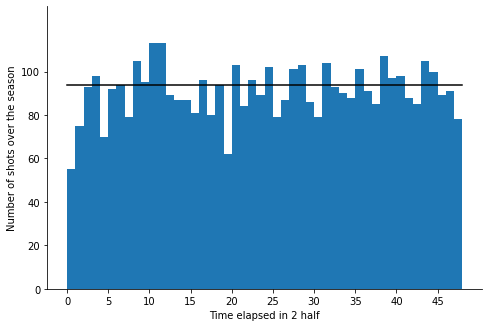

In [7]:
from pylab import rcParams
# rcParams['figure.figsize'] = 12/2.54, 8/2.54
rcParams['figure.figsize'] = 12/1.54, 8/1.54

matplotlib.font_manager.FontProperties(family='Helvetica',size=11)

#Set up figure
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

#Plot histogram of shots
plt.hist(the_shots/60, bins = range(0,49))
plt.plot([0, 48],[shots_per_min, shots_per_min], color='black')
 
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_position('zero')    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(np.arange(0,48,5))

ax.set_xlabel('Time elapsed in ' + half[0] + ' half')
if isgoal==0:
    ax.set_ylabel('Number of shots over the season')
    ax.set_yticks(np.arange(0,120,20))
    ax.set_ylim(0,130)
else:
    ax.set_ylabel('Number of goals over the season')
    ax.set_yticks(np.arange(0,20,2))
    ax.set_ylim(0,20) 
    
plt.show()

In [8]:
#Save to pdf
if isgoal:
    fig.savefig('../static/img/goal' + half +'.pdf' , dpi=None, bbox_inches="tight")
else:
    fig.savefig('../static/img/notgoal' + half +'.pdf' , dpi=None, bbox_inches="tight")